In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

 <h3><b>Reading Train and Test datasets</b></h3>

In [2]:
train = pd.read_csv("Dataset/train_v9rqX0R.csv")
test = pd.read_csv("Dataset/test_AbJTz2l.csv")

<h3><b>Exploring the dataset</b></h3>

In [3]:
train.shape

(8523, 12)

In [4]:
test.shape

(5681, 11)

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


<h3><b>Identify missing values in the dataset</b></h3>

In [11]:
# Counting the number of missing values in each column of the train dataset

missing_val = train.isnull().sum()
print(missing_val)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [12]:
# Counting the number of missing values in each column of the test dataset

missing_val = test.isnull().sum()
print(missing_val)

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


<h3><b>Check for and remove any duplicate rows in the dataset </b></h3>

In [13]:
# Identify duplicate rows based on all columns for train dataset
duplicate_rows = train.duplicated(keep=False)

# Filter and sort the duplicate rows
duplicate_df = train[duplicate_rows]
duplicate_df_sorted = duplicate_df.sort_values(by=list(train.columns))

# Display the sorted duplicate rows
print(duplicate_df_sorted)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [14]:
# Identify duplicate rows based on all columns for train dataset
duplicate_rows = test.duplicated(keep=False)

# Filter and sort the duplicate rows
duplicate_df = test[duplicate_rows]
duplicate_df_sorted = duplicate_df.sort_values(by=list(test.columns))

# Display the sorted duplicate rows
print(duplicate_df_sorted)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []


<h3><b>Finding the number of unique values in the dataset</b></h3>

In [15]:
# Iterate over each column and print the number of unique values
for column in train.columns:
    unique_values = train[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'Item_Identifier' has 1559 unique values.
Column 'Item_Weight' has 415 unique values.
Column 'Item_Fat_Content' has 5 unique values.
Column 'Item_Visibility' has 7880 unique values.
Column 'Item_Type' has 16 unique values.
Column 'Item_MRP' has 5938 unique values.
Column 'Outlet_Identifier' has 10 unique values.
Column 'Outlet_Establishment_Year' has 9 unique values.
Column 'Outlet_Size' has 3 unique values.
Column 'Outlet_Location_Type' has 3 unique values.
Column 'Outlet_Type' has 4 unique values.
Column 'Item_Outlet_Sales' has 3493 unique values.


In [16]:
# Iterate over each column and print the number of unique values
for column in test.columns:
    unique_values = test[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'Item_Identifier' has 1543 unique values.
Column 'Item_Weight' has 410 unique values.
Column 'Item_Fat_Content' has 5 unique values.
Column 'Item_Visibility' has 5277 unique values.
Column 'Item_Type' has 16 unique values.
Column 'Item_MRP' has 4402 unique values.
Column 'Outlet_Identifier' has 10 unique values.
Column 'Outlet_Establishment_Year' has 9 unique values.
Column 'Outlet_Size' has 3 unique values.
Column 'Outlet_Location_Type' has 3 unique values.
Column 'Outlet_Type' has 4 unique values.


<h3><b>Analysing the categorical columns</b></h3>

In [17]:
# Selecting only the object type columns
object_columns = train.select_dtypes(include='object')

# Looping through each object column and displaying the value counts
for column in object_columns:
    print(f"Value counts for {column}:")
    print(train[column].value_counts())
    print()

Value counts for Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Value counts for Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Value counts for Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Value counts for Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930

In [18]:
# Looping through each object column and displaying the value counts
for column in object_columns:
    print(f"Value counts for {column}:")
    print(test[column].value_counts())
    print()

Value counts for Item_Identifier:
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

Value counts for Item_Fat_Content:
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Value counts for Item_Type:
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Value counts for Outlet_Identifier:
OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    61

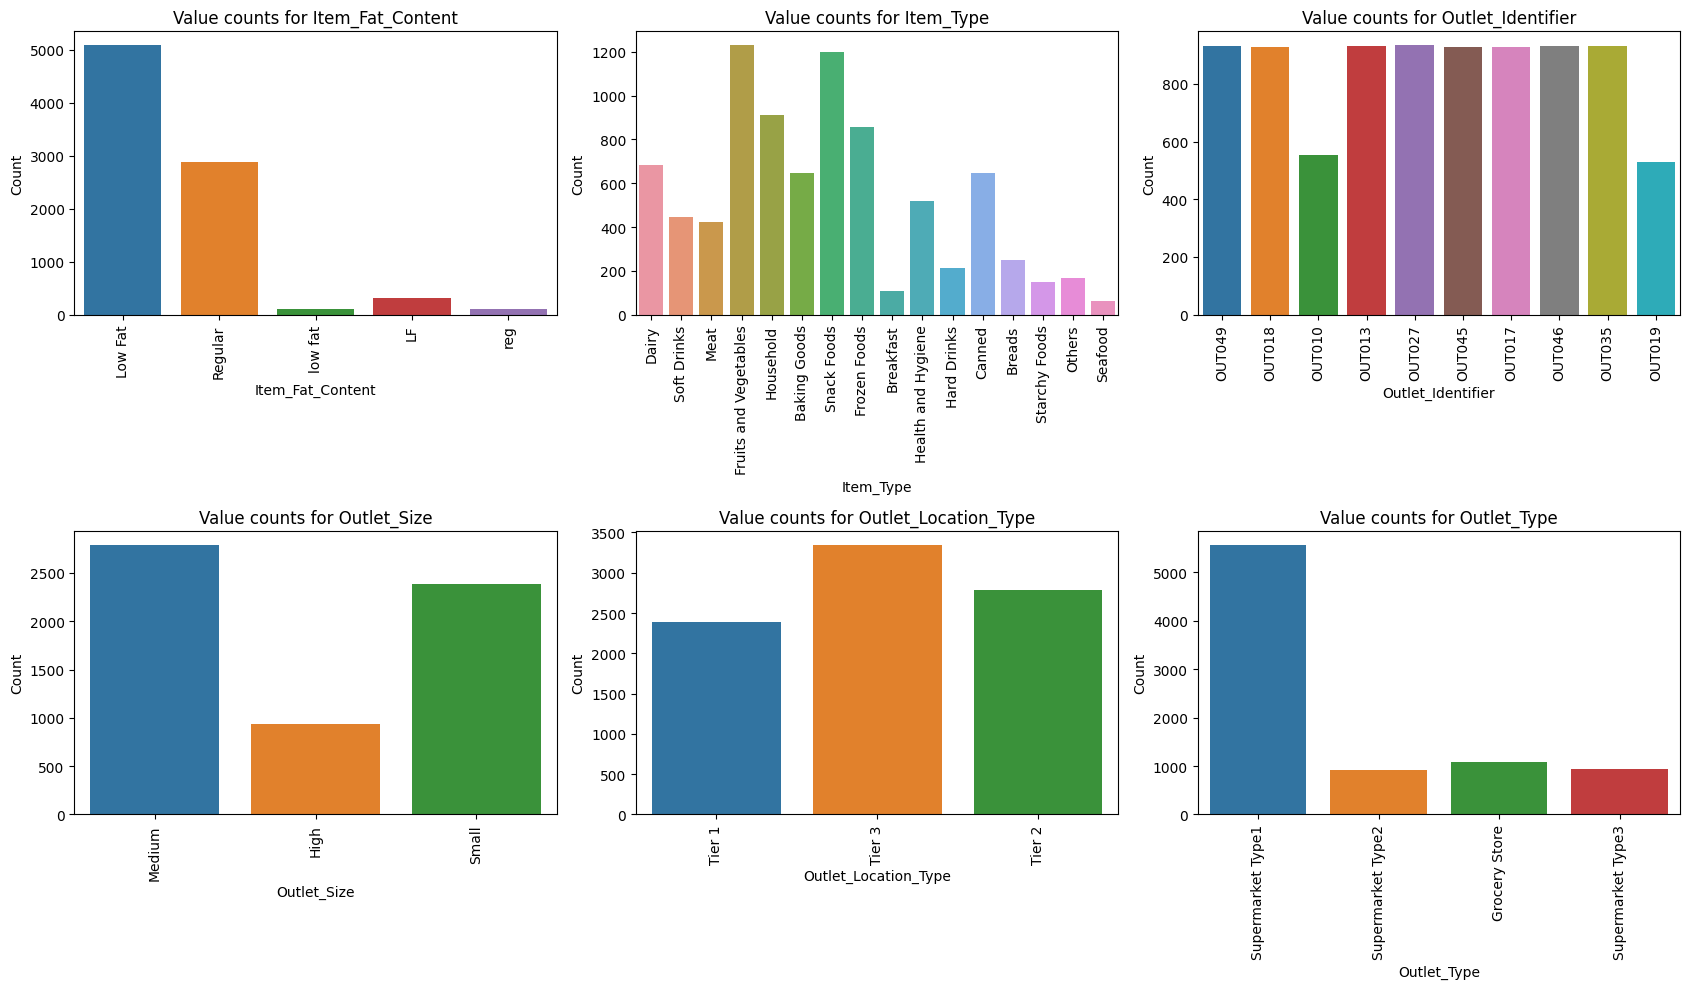

In [19]:
# Selecting only the object type columns
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

categorical_df = train[categorical_features]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 10))

for i, column in enumerate(categorical_df):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=train, x=column, ax=ax)
    ax.set_title(f"Value counts for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Adjusting the layout and spacing
plt.tight_layout()

# Displaying the plots
plt.show()

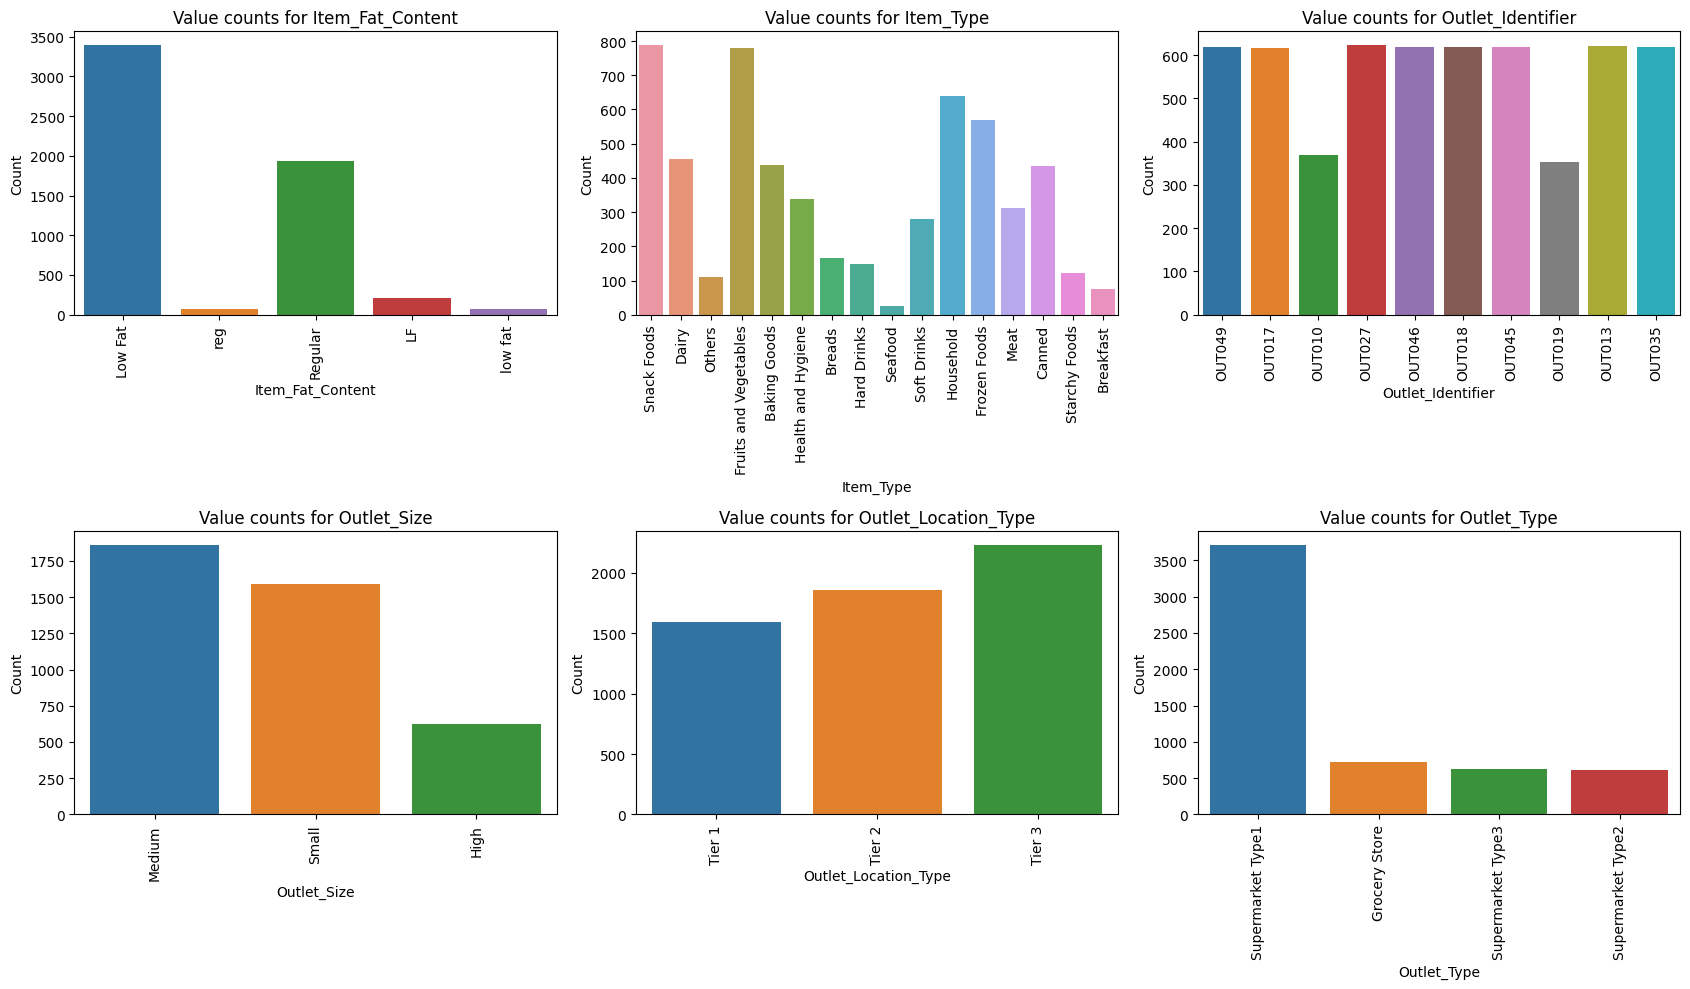

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 10))

for i, column in enumerate(categorical_df):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=test, x=column, ax=ax)
    ax.set_title(f"Value counts for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=90) 

# Adjusting the layout and spacing
plt.tight_layout()

# Displaying the plots
plt.show()

<li>The 'FatContent' column has categorical values 'LF' and 'low fat' which is the same as'Low Fat' category.</li>
<li>The value 'reg' which is same as 'Regular'.</li>
 So lets convert values to either 'Low Fat' or 'Regular' based on the given data.

In [21]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

In [22]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('LF', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('low fat', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

<h3><b>Analysing the numerical columns</b></h3>

In [23]:
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

numeric_df1 = train[numeric_features]
numeric_df2 = test[numeric_features]

In [24]:
# Looping through each object column and displaying the value counts
for column in numeric_features:
    print(f"Value counts for {column}:")
    print(train[column].value_counts())
    print()

Value counts for Item_Weight:
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

Value counts for Item_Visibility:
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Value counts for Item_MRP:
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

Value counts for Outlet_Establishment_Year:
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64



In [25]:
# Looping through each object column and displaying the value counts
for column in numeric_features:
    print(f"Value counts for {column}:")
    print(test[column].value_counts())
    print()

Value counts for Item_Weight:
10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Item_Weight, Length: 410, dtype: int64

Value counts for Item_Visibility:
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: Item_Visibility, Length: 5277, dtype: int64

Value counts for Item_MRP:
57.0614     5
99.4700     4
141.2154    4
236.4564    4
186.8898    4
           ..
156.3288    1
125.7388    1
42.6086     1
105.9964    1
79.7960     1
Name: Item_MRP, Length: 4402, dtype: int64

Value counts for Outlet_Establishment_Year:
1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64



<Figure size 1700x1000 with 0 Axes>

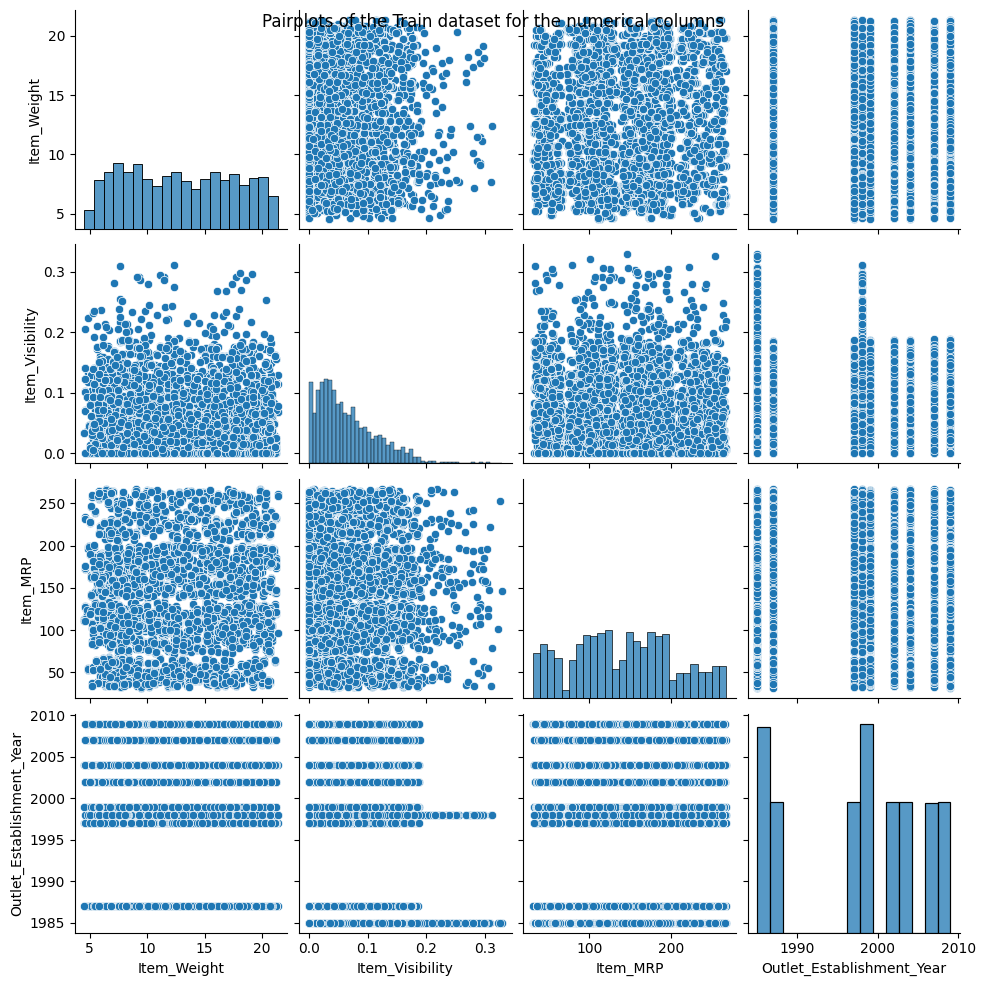

In [26]:
plt.figure(figsize=(17, 10))

sns.pairplot(numeric_df1)

plt.suptitle('Pairplots of the Train dataset for the numerical columns')

plt.show()

<Figure size 1700x1000 with 0 Axes>

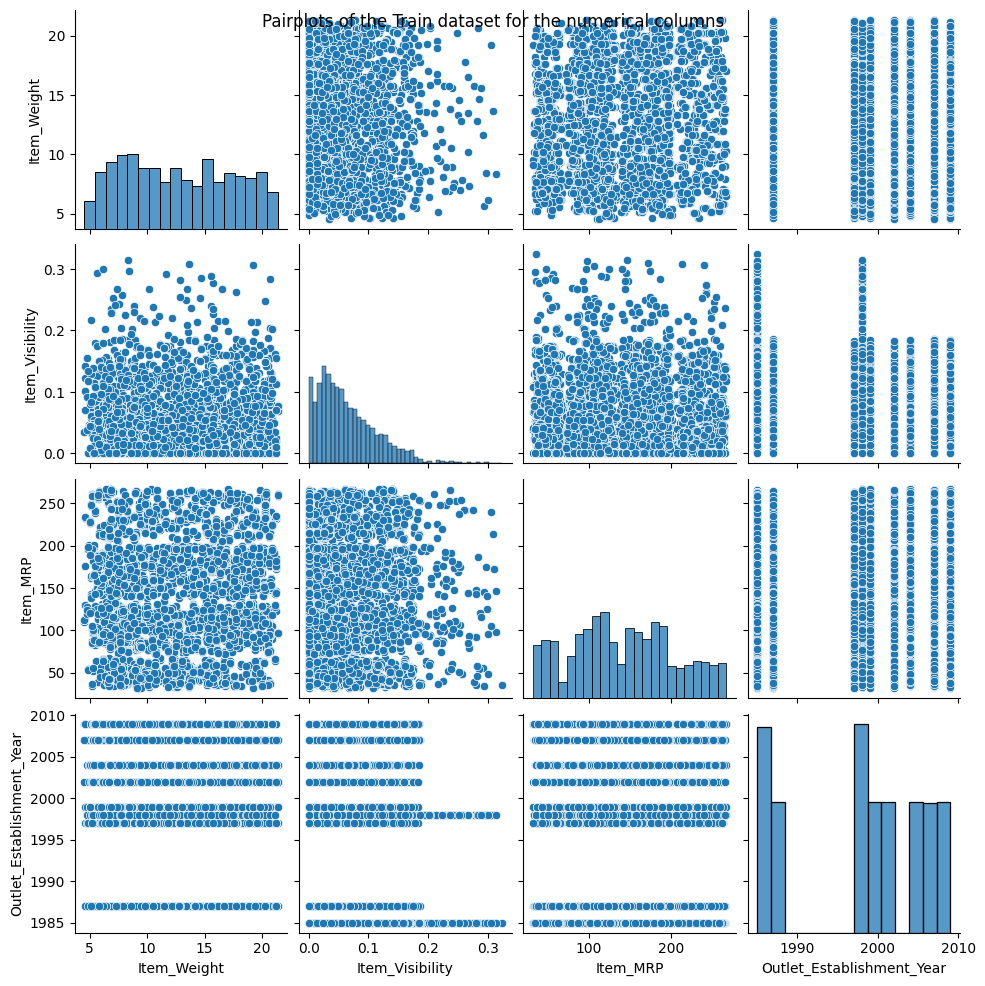

In [27]:
plt.figure(figsize=(17, 10))

sns.pairplot(numeric_df2)

plt.suptitle('Pairplots of the Train dataset for the numerical columns')

plt.show()

<h3><b>Handling missing data</b></h3>

In [28]:
train_sorted = train.sort_values(by=['Item_Identifier'])
train_sorted.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772


In [29]:
test_sorted = test.sort_values(by=['Item_Identifier'])
test_sorted.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5081,DRA12,11.60,Low Fat,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1
500,DRA12,11.60,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1
3912,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3
2847,DRA24,19.35,Regular,0.040091,Soft Drinks,163.6868,OUT018,2009,Medium,Tier 3,Supermarket Type2
4538,DRA24,19.35,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1


**It can be seen that in that if we sort the dataset by 'Item_Identifier' we can figure out the missing weight values from the given weights of the same product by looking at the weight column**

In [30]:
#Filling the missing weight values
train['Item_Weight'] = train.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))

In [31]:
#Filling the missing weight values
test['Item_Weight'] = test.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))

In [32]:
train_sorted = train.sort_values(by=['Item_Identifier'])
train_sorted.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772


In [33]:
test_sorted = test.sort_values(by=['Item_Identifier'])
test_sorted.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5081,DRA12,11.60,Low Fat,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1
500,DRA12,11.60,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1
3912,DRA12,11.60,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3
2847,DRA24,19.35,Regular,0.040091,Soft Drinks,163.6868,OUT018,2009,Medium,Tier 3,Supermarket Type2
4538,DRA24,19.35,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1


<h3><b>Analysing the columns Outlet_Identifier, Outlet_Type and Outlet_Size with each other so that we can figure out how to fill the missing values in the OutletSize column</b></h3>

<h3><b>For Train dataset:</b></h3>

In [34]:
outlet_unique_sizes_train = train.groupby('Outlet_Identifier')['Outlet_Size'].unique()
outlet_unique_sizes_train

Outlet_Identifier
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: Outlet_Size, dtype: object

In [35]:
unique_sizes_train2 = train.groupby('Outlet_Identifier')['Outlet_Type'].unique()
unique_sizes_train2

Outlet_Identifier
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: Outlet_Type, dtype: object

In [36]:
unique_sizes_train3 = train.groupby('Outlet_Type')['Outlet_Size'].unique()
unique_sizes_train3

Outlet_Type
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: Outlet_Size, dtype: object

<h3><b>For test dataset:</b></h3>

In [37]:
outlet_unique_sizes_test = test.groupby('Outlet_Identifier')['Outlet_Size'].unique()
outlet_unique_sizes_test

Outlet_Identifier
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: Outlet_Size, dtype: object

In [38]:
unique_sizes_test2 = test.groupby('Outlet_Identifier')['Outlet_Type'].unique()
unique_sizes_test2

Outlet_Identifier
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: Outlet_Type, dtype: object

In [39]:
unique_sizes_test3 = test.groupby('Outlet_Type')['Outlet_Size'].unique()
unique_sizes_test3

Outlet_Type
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, nan, Small, High]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: Outlet_Size, dtype: object

**It makes sense to fill the missing values in 'OutetSize' column whose 'OutletType' is a 'Grocery Store' with the value 'Small'.
For the missing values in 'OutletSize' column whose 'OutletType' is a 'Supermarket Type1', it is best use its mode value.**

In [40]:
# Fill missing values with 'Small' where OutletType is 'Grocery Store'
train.loc[(train['Outlet_Type'] == 'Grocery Store') & (train['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
# Fill missing values with 'Small' where OutletType is 'Grocery Store'
test.loc[(test['Outlet_Type'] == 'Grocery Store') & (test['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [42]:
# Counting the number of missing values in each column of the train dataset

missing_val = train.isnull().sum()
print(missing_val)

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [43]:
# Counting the number of missing values in each column of the test dataset

missing_val = test.isnull().sum()
print(missing_val)

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1236
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


**Filling the missing values in OutletSize column with its mode**

In [44]:
rows_with_missing = train[train.isnull().any(axis=1)]

rows_with_missing.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384


In [45]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode().iloc[0])
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mode().iloc[0])

In [46]:
rows_with_missing = test[test.isnull().any(axis=1)]

rows_with_missing.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
10,FDT44,16.600,Low Fat,0.103569,Fruits and Vegetables,118.3466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [47]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode().iloc[0])
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mode().iloc[0])

<h3><b>Applying Label Encoding the categorical columns who have ordinal values</b></h3>

<h3><b>For Train dataset:</b></h3>

In [48]:
# Initialize the Label Encoder in train dataset
le = LabelEncoder()

desired_order_FatContent = ['Low Fat', 'Regular']

le.fit(desired_order_FatContent)

train['Item_Fat_Content']=le.transform(train['Item_Fat_Content'])

In [49]:
desired_order_OutletSize = ['Small', 'Medium', 'High']

le.fit(desired_order_OutletSize)

train['Outlet_Size']=le.transform(train['Outlet_Size'])

In [50]:
desired_order_OutletLocation = ['Tier 3', 'Tier 2', 'Tier 1']

le.fit(desired_order_OutletLocation)

train['Outlet_Location_Type']=le.transform(train['Outlet_Location_Type'])

In [51]:
desired_order_OutletType = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

le.fit(desired_order_OutletType)

train['Outlet_Type']=le.transform(train['Outlet_Type'])

<h3><b>For test dataset:</b></h3>

In [52]:
le.fit(desired_order_FatContent)

test['Item_Fat_Content']=le.transform(test['Item_Fat_Content'])

In [53]:
le.fit(desired_order_OutletSize)

test['Outlet_Size']=le.transform(test['Outlet_Size'])

In [54]:
le.fit(desired_order_OutletLocation)

test['Outlet_Location_Type']=le.transform(test['Outlet_Location_Type'])

In [55]:
le.fit(desired_order_OutletType)

test['Outlet_Type']=le.transform(test['Outlet_Type'])

In [56]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052


In [57]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,2007,2,1,1
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,1998,2,2,0
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,2,1,1
4,FDY38,13.600,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,3


<h3><b>Checking the Correlation among the dataset features and target variable</b><h3>

In [58]:
correlation_matrix = train.corr(numeric_only=True)

target_correlation = correlation_matrix['Item_Outlet_Sales']

print(target_correlation)

Item_Weight                  0.013155
Item_Fat_Content             0.018719
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.162753
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64


In [59]:
# Calculate Pearson correlation
pearson_corr = train.corr(method='pearson', numeric_only=True)

# Create a mask to hide the upper triangle
pearson_mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

# Calculate Spearman correlation
spearman_corr = train.corr(method='spearman', numeric_only=True)

# Create a mask to hide the upper triangle
spearman_mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

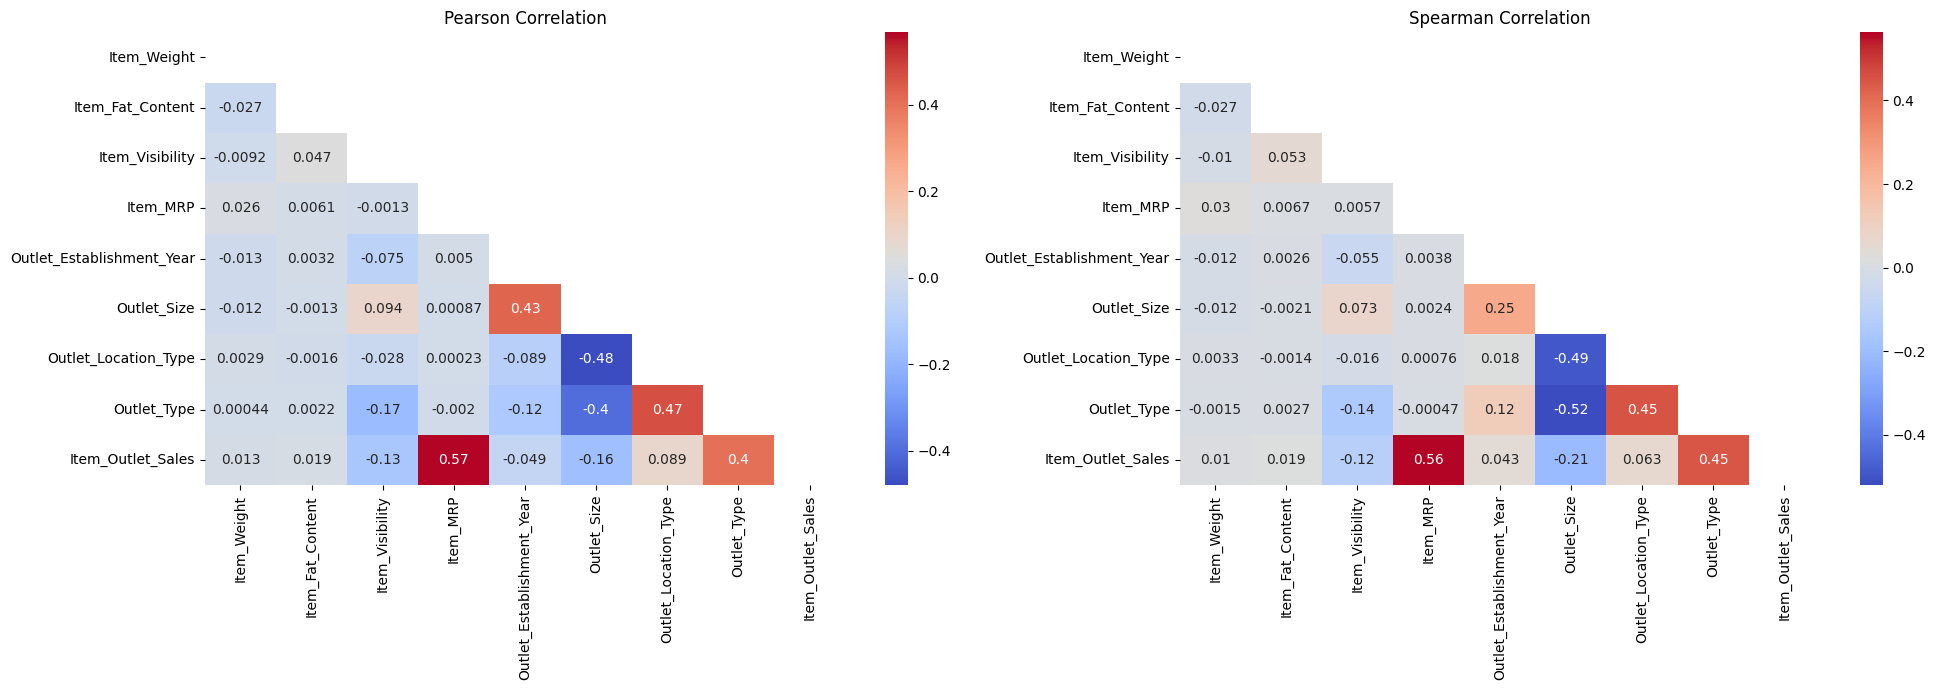

In [60]:
# Create a figure with two subplots in a row
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plot Pearson correlation heatmap
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', mask=pearson_mask, ax=axes[0])
axes[0].set_title('Pearson Correlation')

# Plot Spearman correlation heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', mask=spearman_mask, ax=axes[1])
axes[1].set_title('Spearman Correlation')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [61]:
train.to_csv('train_encoded.csv', index=False)
test.to_csv('test_encoded.csv', index=False)